## __Technical Analysis__
#### *Vansh Agarwal B21AI042*
#### *Smruti Dawale B21BB07*
#### *Sharonya Jain B21ES019*
#### *Samaksh Verma B21AI037*

In [956]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline
import ta
import seaborn as sns
import plotly.graph_objects as go

### __Exploratory Data Analysis__

In [957]:
data = yf.download('GOOGL', start="2020-01-01", end="2023-04-30")
# close of previous day 
data['BfClose'] = data['Close'].shift(1)
# data["Change"] = (data["Close"] - data["BfClose"])/data["BfClose"] * 100
data["Label"] = np.where(data["Close"] - data["BfClose"] >= 0, 1, -1)
data.info()

/Users/vanshu/Desktop/algoTrading/quant/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 837 entries, 2020-01-02 to 2023-04-28
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       837 non-null    float64
 1   High       837 non-null    float64
 2   Low        837 non-null    float64
 3   Close      837 non-null    float64
 4   Adj Close  837 non-null    float64
 5   Volume     837 non-null    int64  
 6   BfClose    836 non-null    float64
 7   Label      837 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 58.9 KB


In [958]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume,BfClose,Label
count,837.000000,837.000000,837.000000,837.000000,837.000000,8.370000e+02,836.000000,837.000000
mean,103.626065,104.875213,102.411556,103.674322,103.674322,3.538091e+07,103.669937,0.063321
std,25.378230,25.477233,25.153198,25.299463,25.299463,1.554530e+07,25.314290,0.998590
min,52.818501,53.345501,50.443501,52.706501,52.706501,9.312000e+06,52.706501,-1.000000
25%,82.330498,82.960999,81.266502,82.206497,82.206497,2.546800e+07,82.147747,-1.000000
50%,102.649002,103.889999,101.449997,102.800003,102.800003,3.148730e+07,102.761002,1.000000
75%,122.093498,122.785004,121.354500,122.330498,122.330498,4.059370e+07,122.358999,1.000000
max,151.250000,151.546494,148.899002,149.838501,149.838501,1.232000e+08,149.838501,1.000000


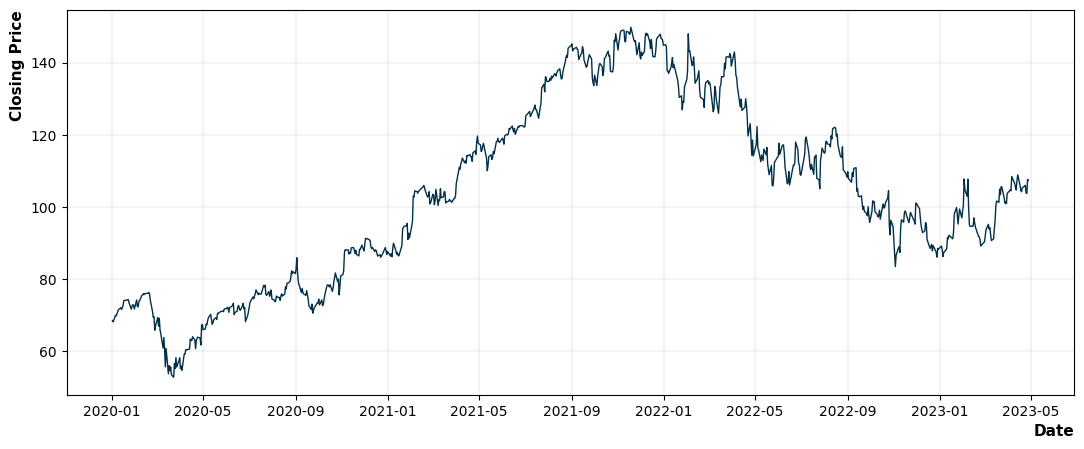

In [959]:
close = data["Close"]
plt.figure(figsize=(13, 5))
plt.plot(close, linewidth=1,  color="#023047")
plt.grid(linewidth=0.2)
plt.ylabel("Closing Price", loc="top", fontdict={"size": 11, "weight":"bold"})
plt.xlabel("Date", loc="right", fontdict={"size": 11, "weight":"bold"})
plt.show()



### __Technical Indicators__

##### __RSI__

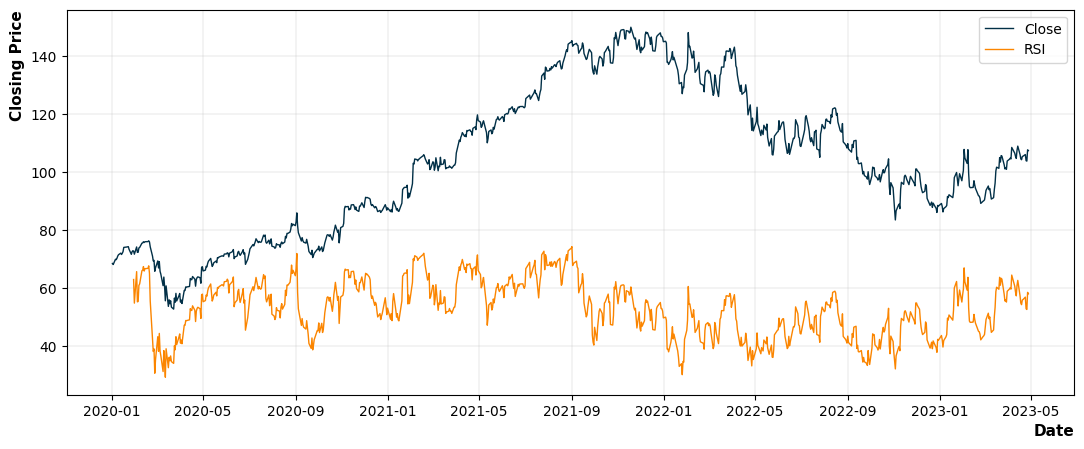

In [960]:
rsi = ta.momentum.RSIIndicator(close=close, fillna=False, window=20).rsi()
plt.figure(figsize=(13, 5))
plt.plot(close, linewidth=1, label="Close",  color="#023047")
plt.plot(rsi, linewidth=1, label="RSI", color="#fb8500")
plt.grid(linewidth=0.2)
plt.ylabel("Closing Price", loc="top", fontdict={"size": 11, "weight":"bold"})
plt.xlabel("Date", loc="right", fontdict={"size": 11, "weight":"bold"})
plt.legend()
plt.show()


##### __MACD__

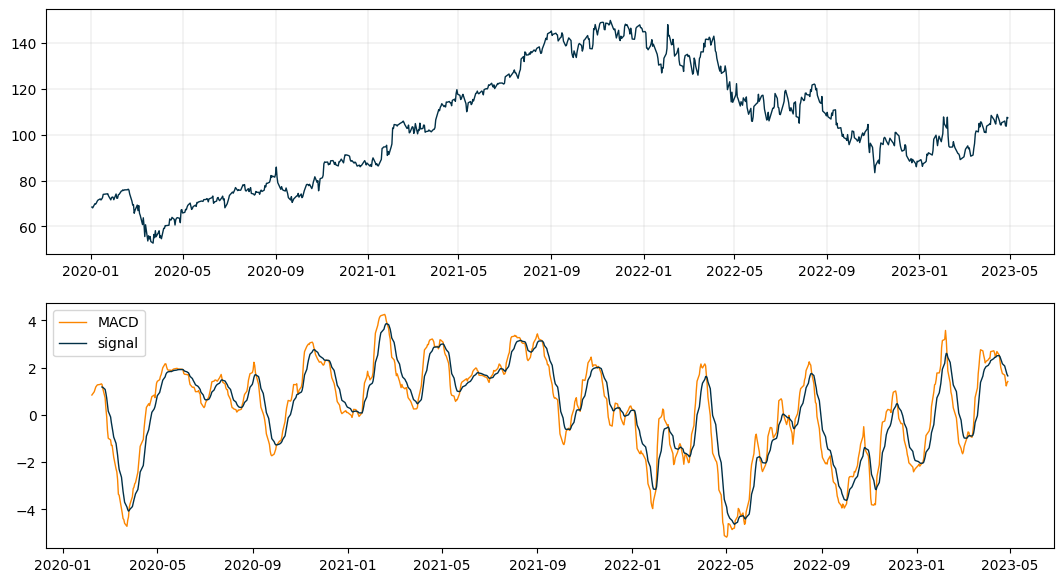

In [961]:
macd_obj = ta.trend.MACD(close=close)
macd = macd_obj.macd()
macd_hist = macd_obj.macd_diff().dropna()
macd_signal = macd_obj.macd_signal()

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(13, 7))
ax1.plot(close, linewidth=1, label="Close", color="#023047")
ax1.grid(linewidth=0.2)

ax2.plot(macd, linewidth=1, color="#fb8500", label="MACD")
ax2.plot(macd_signal, linewidth=1, color="#023047", label="signal")
ax1.grid(linewidth=0.2)
ax2.legend()





##### __Moving Average__

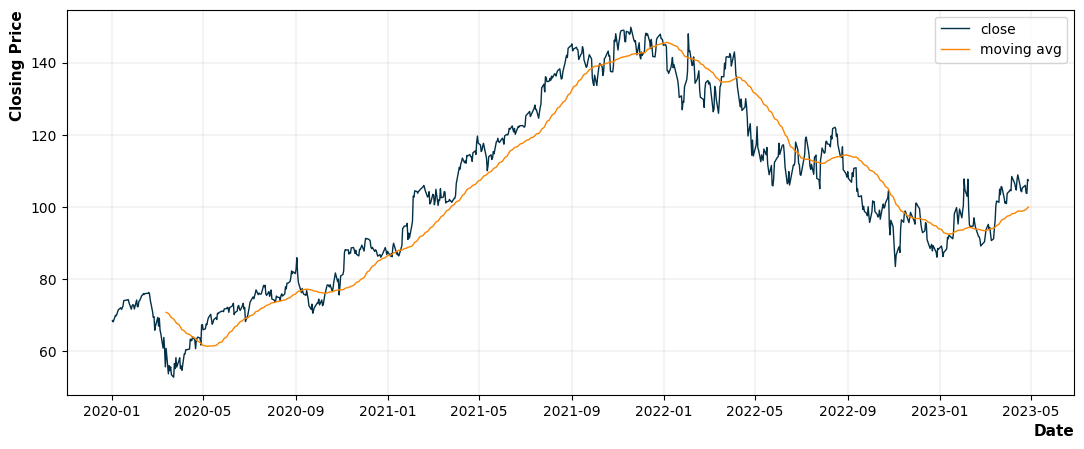

In [962]:
moving_avg = ta.trend.SMAIndicator(close=close, window=50).sma_indicator()

plt.figure(figsize=(13, 5))
plt.plot(close, linewidth=1, label="close",  color="#023047")
plt.plot(moving_avg, linewidth=1, label="moving avg", color="#fb8500")
plt.grid(linewidth=0.2)
plt.ylabel("Closing Price", loc="top", fontdict={"size": 11, "weight":"bold"})
plt.xlabel("Date", loc="right", fontdict={"size": 11, "weight":"bold"})
plt.legend()
plt.show()


##### __EMWA__

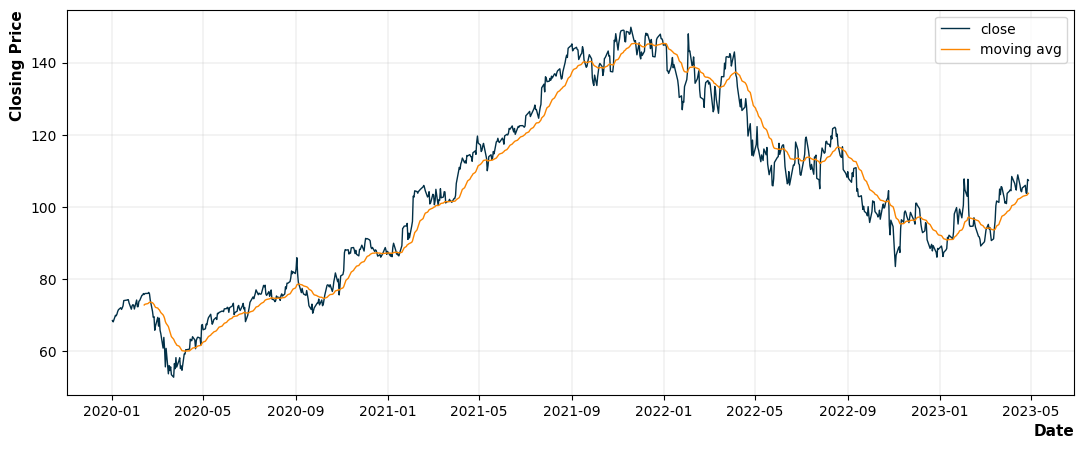

In [963]:
emwa = ta.trend.EMAIndicator(close=close, window=30).ema_indicator()

plt.figure(figsize=(13, 5))
plt.plot(close, linewidth=1, label="close",  color="#023047")
plt.plot(emwa, linewidth=1, label="moving avg", color="#fb8500")
plt.grid(linewidth=0.2)
plt.ylabel("Closing Price", loc="top", fontdict={"size": 11, "weight":"bold"})
plt.xlabel("Date", loc="right", fontdict={"size": 11, "weight":"bold"})
plt.legend()
plt.show()

##### __ADX__

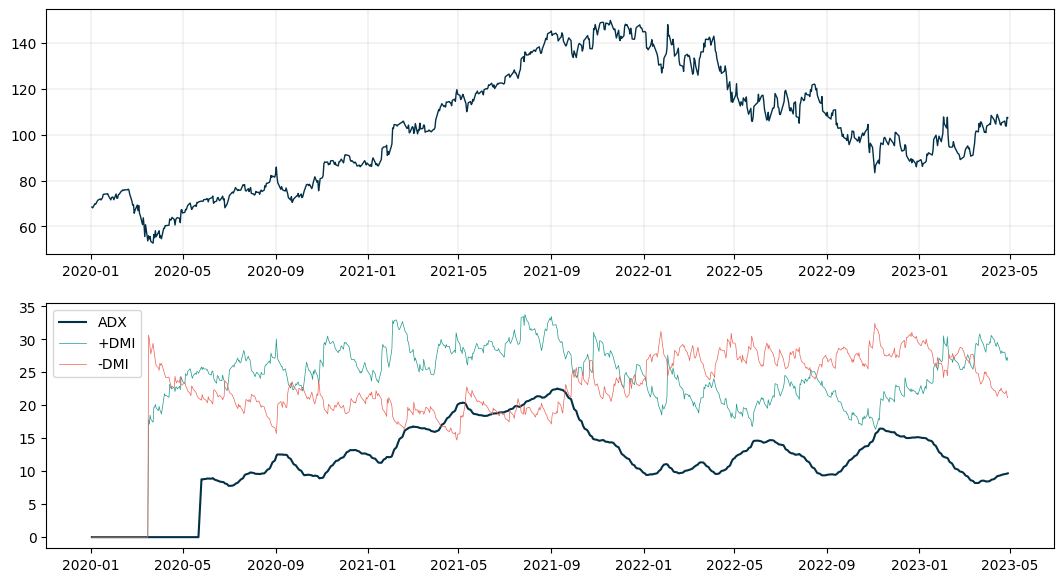

In [964]:
adx_obj = ta.trend.ADXIndicator(high=data["High"], low=data["Low"], close=data["Close"], window=50)
adx = adx_obj.adx().dropna()
adx_pos = adx_obj.adx_pos().dropna()
adx_neg = adx_obj.adx_neg().dropna()

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(13, 7))
ax1.plot(close, linewidth=1, label="Close", color="#023047")
ax1.grid(linewidth=0.2)

ax2.plot(adx, linewidth=1.5, color="#023047", label="ADX")
ax2.plot(adx_pos, linewidth=0.5, color="#1b998b", label="+DMI")
ax2.plot(adx_neg, linewidth=0.5, color="#ee6055", label="-DMI")

ax1.grid(linewidth=0.2)
ax2.legend()


##### __Bollinger Bands__

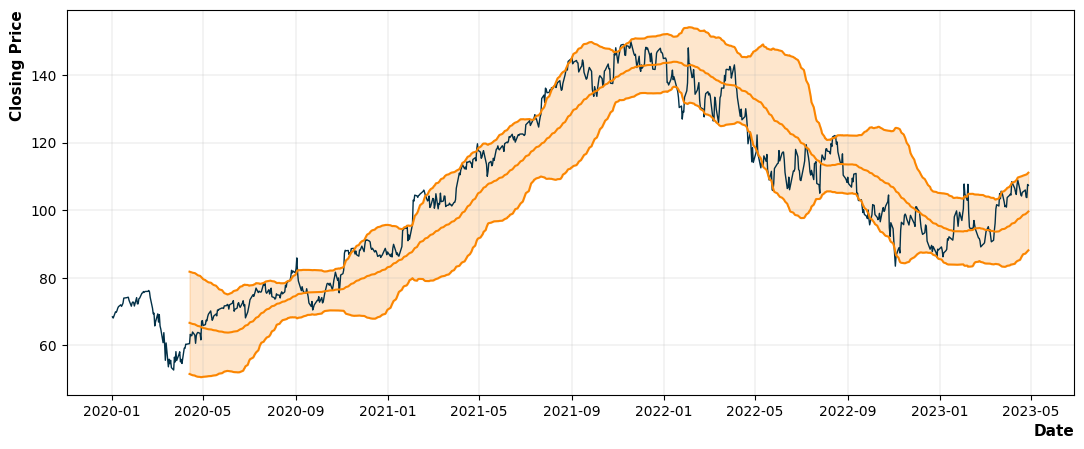

In [965]:
bb = ta.volatility.BollingerBands(close=close, window=70)
bb_m = bb.bollinger_mavg()
bb_h = bb.bollinger_hband()
bb_l = bb.bollinger_lband()


plt.figure(figsize=(13, 5))
plt.plot(close, linewidth=1,  color="#023047")
plt.plot(bb_h, linewidth=1.5,  color="#fb8500")
plt.plot(bb_l, linewidth=1.5,  color="#fb8500")
plt.plot(bb_m, linewidth=1.5,  color="#fb8500")
plt.fill_between(x=data.index, y1=bb_h, y2=bb_l, alpha=0.2, color="#fb8500")

plt.grid(linewidth=0.2)
plt.ylabel("Closing Price", loc="top", fontdict={"size": 11, "weight":"bold"})
plt.xlabel("Date", loc="right", fontdict={"size": 11, "weight":"bold"})
plt.show()



### __Correlation Analysis__

<Axes: >

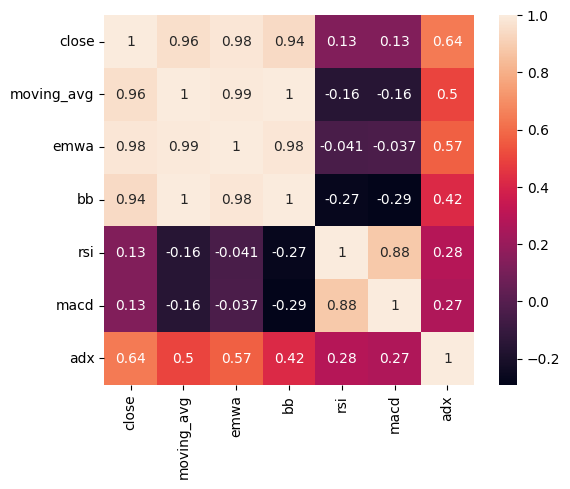

In [966]:
tech_ind = pd.DataFrame({
  "close": close,
  "moving_avg": moving_avg,
  "emwa": emwa,
  "bb": bb_m,
  "rsi": rsi,
  "macd": macd,
  "adx": adx
})

sns.heatmap(tech_ind.corr(), annot=True, square=True)

### __Combined Indicator__

In [967]:
# emwa, bb, rsi, adx 
tech_ind["bb_h"] = bb_h
tech_ind["bb_l"] = bb_l
tech_ind["adx_pos"] = adx_pos
tech_ind["adx_neg"] = adx_neg
tech_ind["macd_signal"] = macd_signal
weights = np.array([0.98, 0.94, 0.5, 0.64]) 

def combined_indicator(row):
  global weights
  rsi_pred = weights[2] * (1 if row["rsi"]>=50 else -1)
  bb_pred = -1
  if row["close"]<=row["bb_l"] or (row["close"]<=row["bb_h"] and row["close"]>=row["bb"]):
    bb_pred = 1
  # return bb_pred

  bb_pred *= weights[1]
  adx_pred = weights[3] * (1 if row["adx_pos"] >= row["adx_neg"] else -1)
  emwa_pred = weights[0] * (1 if row["close"] >= row["emwa"] else -1) 
  return (1 if (rsi_pred+bb_pred+adx_pred+emwa_pred)/np.sum(weights) > 0 else -1)


tech_ind["Label_Predicted"] = tech_ind.apply(combined_indicator, axis=1)
tech_ind.head()


,close,moving_avg,emwa,bb,rsi,macd,adx,bb_h,bb_l,adx_pos,adx_neg,macd_signal,Label_Predicted
Date,,,,,,,,,,,,,
2020-01-02,68.433998,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,NaN,-1
2020-01-03,68.075996,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,NaN,-1
2020-01-06,69.890503,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,NaN,-1
2020-01-07,69.755501,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,NaN,-1
2020-01-08,70.251999,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,NaN,-1


In [968]:
tech_ind["true_label"] = data["Label"]
tech_ind = tech_ind.dropna(axis=0)
tech_ind.shape

correct = len(tech_ind.loc[tech_ind["Label_Predicted"] == tech_ind["true_label"]])
print(f"Accuracy: {round(correct/tech_ind.shape[0]*100, 2)}%")


Accuracy: 57.68%


In [969]:
label_dict = {
  1: "L",
  -1: "S"
}

df_save = tech_ind.loc[:, ["close", "Label_Predicted", "true_label"]]
df_save["true_label"] = df_save["true_label"].map(label_dict)
df_save["Label_Predicted"] = df_save["Label_Predicted"].map(label_dict)
df_save.to_csv("stock_data.csv")
